# Libraries

In [1]:
# Packages for dataframe operations
import numpy as np 
import pandas as pd
# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import collections

import re
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
import pickle
import nltk

# Import DataSet for 2020

In [2]:
df = pd.read_csv('data_2020.csv') 

In [3]:
df

,Post,Name,Datetime,Story,year
0,post-6658254,touberornottouber,"Dec 1, 2020 at 12:34 PM",I get a request for a 7 minute trip on Uber to...,2020
1,post-6438395,Young Kim,"Aug 10, 2020 at 11:20 PM","Had a young lady pax so uber vegan, that I was...",2020
2,post-6679137,Young Kim,"Dec 13, 2020 at 8:31 AM",Had a pax who was just working now at a restau...,2020
3,post-6486138,AB5,"Aug 30, 2020 at 3:32 PM",Stop being surfs!!!,2020
4,post-6539343,FLKeys,"Sep 28, 2020 at 11:05 AM",Saturday morning around 2:10 AM I get a Comfor...,2020
...,...,...,...,...,...
435,post-6396293,Young Kim,"Jul 23, 2020 at 5:44 PM","When I opened the envelope in the mail, I saw ...",2020
436,post-6396821,SleelWheels,"Jul 23, 2020 at 9:11 PM","Well another first for me, picked up a guy who...",2020
437,post-6392408,Mkang14,"Jul 22, 2020 at 4:26 AM",My buddy just did a good deed. From the botto...,2020
438,post-6395388,The Jax,"Jul 23, 2020 at 11:10 AM",I have been delivering over 20 years and over ...,2020


## Set Mallet Path 

In [5]:
MALLET_PATH = '/Users/phoebekalochoritou/Downloads/mallet-2.0.8/bin/mallet'

#### Set stories as data

In [7]:
data = df.Story

In [8]:
data

0      I get a request for a 7 minute trip on Uber to...
1      Had a young lady pax so uber vegan, that I was...
2      Had a pax who was just working now at a restau...
3                                    Stop being surfs!!!
4      Saturday morning around 2:10 AM I get a Comfor...
                             ...                        
435    When I opened the envelope in the mail, I saw ...
436    Well another first for me, picked up a guy who...
437    My buddy  just did a good deed. From the botto...
438    I have been delivering over 20 years and over ...
439    Uber ran my annual background check.\n\n\n\n\n...
Name: Story, Length: 440, dtype: object

In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['get', 'request', 'for', 'minute', 'trip', 'on', 'uber', 'to', 'pick', 'up', 'at', 'chipotle', 'get', 'there', 'and', 'the', 'place', 'is', 'deserted', 'don', 'think', 'it', 'was', 'actually', 'open', 'yet', 'save', 'for', 'man', 'sitting', 'at', 'one', 'of', 'the', 'outside', 'tables', 'the', 'guy', 'looked', 'bit', 'poor', 'like', 'your', 'normal', 'lower', 'class', 'service', 'worker', 'here', 'really', 'the', 'guy', 'gets', 'in', 'and', 'immediately', 'slams', 'my', 'door', 'but', 'apologizes', 'right', 'away', 'fair', 'play', 'think', 'to', 'myself', 'at', 'least', 'he', 'apologized', 'he', 'ended', 'up', 'being', 'pretty', 'good', 'passenger', 'and', 'he', 'asked', 'me', 'lot', 'about', 'uber', 'think', 'this', 'might', 'have', 'been', 'his', 'first', 'uber', 'ride', 'at', 'the', 'destination', 'end', 'the', 'trip', 'and', 'explain', 'that', 'it', 'should', 'pop', 'up', 'on', 'his', 'phone', 'in', 'minute', 'or', 'so', 'with', 'record', 'of', 'the', 'trip', 'and', 'what', 'it',

# Building models

In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['get', 'request', 'for', 'minute', 'trip', 'on', 'uber', 'to', 'pick', 'up', 'at', 'chipotle', 'get', 'there', 'and', 'the', 'place', 'is', 'deserted', 'don', 'think', 'it', 'was', 'actually', 'open', 'yet', 'save', 'for', 'man', 'sitting', 'at', 'one', 'of', 'the', 'outside', 'tables', 'the', 'guy', 'looked', 'bit', 'poor', 'like', 'your', 'normal', 'lower', 'class', 'service', 'worker', 'here', 'really', 'the', 'guy', 'gets', 'in', 'and', 'immediately', 'slams', 'my', 'door', 'but', 'apologizes', 'right', 'away', 'fair', 'play', 'think', 'to', 'myself', 'at', 'least', 'he', 'apologized', 'he', 'ended', 'up', 'being', 'pretty', 'good', 'passenger', 'and', 'he', 'asked', 'me', 'lot', 'about', 'uber', 'think', 'this', 'might', 'have', 'been', 'his', 'first', 'uber', 'ride', 'at', 'the', 'destination', 'end', 'the', 'trip', 'and', 'explain', 'that', 'it', 'should', 'pop', 'up', 'on', 'his', 'phone', 'in', 'minute', 'or', 'so', 'with', 'record', 'of', 'the', 'trip', 'and', 'what', 'it', 

# Stopwords

## Define them

In [ ]:
nltk.download('stopwords') 
stopwords = nltk.corpus.stopwords.words('english')
stop_words = list(stopwords)
extra = ['uber', 'driver','one', 'provide', 'include', 'works', 'also', 'look', 'another', 'extra', 'someone', 'fact',
         'think', 'everyone', 'since', 'ever', 'likely', 'maybe', 'lot', 'would', 'like', 'mean', 'say',
         'though', 'want', 'guy', 'stil', 'however', 'said', ' ', 'work', 'job', 'year', 'try', 'decide',
         'move', 'obviously', 'man', 'woman', '+', 'literally', '>', '<', 'keep', 'thing', 'look', 'ok',
         'living', 'instead', 'home', 'yesterday', 'today', 'see', 'fall', 'na', 'lady', 'girl', 'probably',
         'guess', 'legit', 'somebody', 'someone', 'know', 'something', 'start', 'much', 'even', 'trying',
         'lol', 'call', 'around', 'every', 'minute', 'according', 'need', 'could', 'back', 'used', 'two',
         'first', 'taking', 'become', 'actually', 'next', 'real', 'go', 'sure', 'yet', 'pick', 'anything',
         'without', 'with', 'got', 'put', 'read', 'come', 'might', 'driver', 'says', 'nothing', 'using',
         'going', 'getting', 'use', 'already', 'paying', 'believe', 'get', 'make', 'u', 'really', 'saying',
         'ask', 'happening', 'may', 'alway', 'still', 'left', 'person', 'drivers', 'people', 'driving', 'long',
         'dont', 'happen', 'told', 'tell', 'women', 'yeah', 'post', 'mr', 'simply', 'show', 'place', 'always',
         'usually', 'sometimes', 'way', 'things', 'many', 'exactly', 'called', 'call', 'give', 'thought', 'either',
         'rider', 'gets', 'last', 'ye', 'whether', 'unless', 'looking', 'means', 'went', 'wants', 'want',
         'seen', 'comes', 'etc', 'asked', 'self', 'tnc', 'the', 'makes', 'hand', 'found', 'find', 'must', 'took',
         'made', 'companie', 'seem', 'friend', 'example', 'name', 'feel', 'including', 'others', 'other', 'started',
         'able', 'leave', 'else', 'or', 'take', 'yes', 'anyone', 'seems', 'comment', 'new', 'pax', 'Hello', 'ok', 'got', 'so', 'it', 'is', 'its', 'guess', 'we',
         'my', 'but', 'too', 'a', 'and', 'today', 'get', 'go','work', 'nan', 'forward', 'ahead', 'send', 'resume', 'car', 'tell', 'ask', 'driver', 'uber', 'list', 'know', 'take', 'minute', 'outta', 'express', 'see', 'the', 'specific', 'accurate',
         'say', 'op', 'be', 'less_than', 'door', 'back', 'pull',  'endless', 'cracker', 'uber', 'drive', 'pax',
         'admire', '$', 'end' 'car', 'driver', 'drive', 'fitting', 'glamorous', 'cute', 'effective',
         'champ', 'certain', 'gave', 'day', 'weeks', 'finally', 'front', 'rides', 'open', 'full', 'story', 'end', 'decided']

stop_words.extend(extra)

## Remove them

In [11]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [12]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load("en_core_web_lg", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['trip', 'desert', 'save', 'sit', 'table', 'look', 'bit', 'poor', 'normal', 'low', 'class', 'service', 'worker', 'immediately', 'slam', 'apologize', 'right', 'away', 'fair', 'play', 'least', 'apologize', 'end', 'pretty', 'good', 'passenger', 'ride', 'destination', 'trip', 'explain', 'pop', 'phone', 'record', 'trip', 'cost', 'second', 'later', 'tell', 'tip', 'tip', 'allow', 'occur', 'gig', 'different', 'passenger', 'tip', 'judge', 'book', 'cover', 'look', 'bad', 'trip', 'good', 'feeling', 'try', 'tip']]


# Dictionary

In [13]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 4), (43, 4), (44, 1), (45, 1)]]


In [14]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('allow', 1),
  ('apologize', 2),
  ('away', 1),
  ('bad', 1),
  ('bit', 1),
  ('book', 1),
  ('class', 1),
  ('cost', 1),
  ('cover', 1),
  ('desert', 1),
  ('destination', 1),
  ('different', 1),
  ('end', 1),
  ('explain', 1),
  ('fair', 1),
  ('feeling', 1),
  ('gig', 1),
  ('good', 2),
  ('immediately', 1),
  ('judge', 1),
  ('later', 1),
  ('least', 1),
  ('look', 2),
  ('low', 1),
  ('normal', 1),
  ('occur', 1),
  ('passenger', 2),
  ('phone', 1),
  ('play', 1),
  ('poor', 1),
  ('pop', 1),
  ('pretty', 1),
  ('record', 1),
  ('ride', 1),
  ('right', 1),
  ('save', 1),
  ('second', 1),
  ('service', 1),
  ('sit', 1),
  ('slam', 1),
  ('table', 1),
  ('tell', 1),
  ('tip', 4),
  ('trip', 4),
  ('try', 1),
  ('worker', 1)]]

# LDA models

In [18]:
n_topics = 10

# model estimation
lda_mallet = gensim.models.wrappers.LdaMallet(MALLET_PATH,
                                              corpus = corpus,
                                              num_topics = n_topics,
                                              id2word = id2word,
                                              random_seed = 1234)

# print results
lda_mallet.print_topics(num_topics = n_topics, num_words = 10)

[(0,
  '0.106*"ride" + 0.072*"cancel" + 0.061*"passenger" + 0.055*"minute" + 0.040*"wait" + 0.023*"pickup" + 0.023*"request" + 0.022*"text" + 0.021*"reason" + 0.021*"arrive"'),
 (1,
  '0.052*"turn" + 0.033*"stop" + 0.028*"head" + 0.025*"light" + 0.025*"road" + 0.022*"pull" + 0.020*"window" + 0.019*"point" + 0.019*"side" + 0.016*"foot"'),
 (2,
  '0.049*"phone" + 0.034*"walk" + 0.026*"run" + 0.025*"close" + 0.023*"hear" + 0.020*"drive" + 0.019*"app" + 0.019*"wife" + 0.016*"open" + 0.016*"check"'),
 (3,
  '0.047*"night" + 0.028*"good" + 0.022*"couple" + 0.021*"guy" + 0.019*"call" + 0.018*"great" + 0.018*"kid" + 0.018*"follow" + 0.018*"hope" + 0.016*"drunk"'),
 (4,
  '0.036*"seat" + 0.034*"drop" + 0.029*"nice" + 0.027*"sit" + 0.026*"hit" + 0.024*"car" + 0.016*"stand" + 0.016*"stop" + 0.015*"pass" + 0.015*"fine"'),
 (5,
  '0.056*"tip" + 0.050*"order" + 0.033*"food" + 0.033*"customer" + 0.031*"delivery" + 0.026*"restaurant" + 0.018*"wait" + 0.018*"eat" + 0.017*"time" + 0.017*"deliver"'),
 (6

# LDA Vis

In [19]:
#from mallet to gensim
lda_mallet_g = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)

In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_mallet_g, corpus, id2word)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.301024  0.043549       1        1  10.848778
1      0.163690 -0.170765       2        1  10.713667
9      0.101276 -0.141595       3        1  10.525575
6      0.004331 -0.044949       4        1  10.229081
2      0.003063 -0.011577       5        1  10.088891
5     -0.087013 -0.064545       6        1  10.003939
7     -0.269455 -0.077577       7        1   9.858262
3      0.144445  0.033267       8        1   9.458395
4      0.190279  0.017303       9        1   9.196561
8      0.050408  0.416888      10        1   9.076850, topic_info=           Term        Freq       Total Category  logprob  loglift
33         ride  313.000000  313.000000  Default  30.0000  30.0000
211      cancel  183.000000  183.000000  Default  29.0000  29.0000
43         trip  168.000000  168.000000  Default  28.0000  28.0000
227      minute  207.000000  207.000000  Default  27.0000  27.0000
26    passenger  188.000000  188.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
794      number   33.302477   50.483327  Topic10  -4.1562   1.9834
593        high   27.560671   38.936005  Topic10  -4.3454   2.0539
649        week   21.818864   29.639430  Topic10  -4.5790   2.0931
955      demand   17.225419   20.595771  Topic10  -4.8154   2.2207
1119        day   18.373780   29.738691  Topic10  -4.7509   1.9179

[662 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
198       1  1.044255   ability
708       6  0.900662  abruptly
324       1  0.665509    accept
324       7  0.324639    accept
988       3  0.989474  accident
...     ...       ...       ...
1167      4  0.160379     wrong
1167      5  0.427678     wrong
1167      9  0.427678     wrong
479       3  0.994324      year
197       5  0.994834      yell

[758 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 10, 7, 3, 6, 8, 4, 5, 9])

## Observe topics over Stories

In [22]:
def format_topics_sentences(ldamodel=lda_mallet_g, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet_g, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.1769,"trip, pay, mile, hour, ping, time, minute, sur...",I get a request for a 7 minute trip on Uber to...
1,1,8.0,0.3365,"rate, number, buy, city, ago, early, break, ca...","Had a young lady pax so uber vegan, that I was..."
2,2,3.0,0.2426,"night, good, couple, guy, call, great, kid, fo...",Had a pax who was just working now at a restau...
3,3,3.0,0.1154,"night, good, couple, guy, call, great, kid, fo...",Stop being surfs!!!
4,4,1.0,0.4236,"turn, stop, head, light, road, pull, window, p...",Saturday morning around 2:10 AM I get a Comfor...
5,5,0.0,0.3083,"ride, cancel, passenger, minute, wait, pickup,...","Saturday night around 3:30 am in Elmhurst, IL ..."
6,6,2.0,0.1508,"phone, walk, run, close, hear, drive, app, wif...",The Giveaway is : ; \n\nCOXPAL A9D Dual Dash ...
7,7,4.0,0.1393,"seat, drop, nice, sit, hit, car, stand, stop, ...",The World Health Organization says this deadly...
8,8,2.0,0.1627,"phone, walk, run, close, hear, drive, app, wif...","So like I’ve said before,\nIt doesn’t matter h..."
9,9,7.0,0.2162,"trip, pay, mile, hour, ping, time, minute, sur...","This afternoon I accepted a trip to ""Ivy Denta..."


# Create Word Clouds

In [23]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

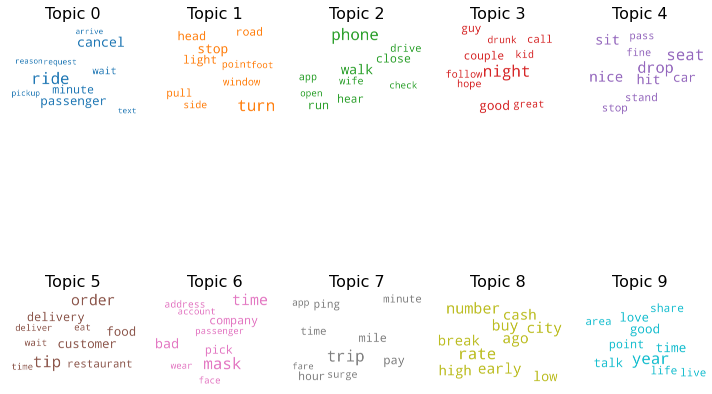

In [24]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_mallet_g.show_topics(formatted = False)

fig, axes = plt.subplots(2,5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Further topic Analysis

In [25]:
#extra libraries
from textblob import TextBlob
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [26]:
#create new columns for polarity
df['polarity'] = df['Story'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['Story'].astype(str).apply(len)
df['word_count'] = df['Story'].apply(lambda x: len(str(x).split()))
df

,Post,Name,Datetime,Story,year,polarity,review_len,word_count
0,post-6658254,touberornottouber,"Dec 1, 2020 at 12:34 PM",I get a request for a 7 minute trip on Uber to...,2020,0.136090,1061,216
1,post-6438395,Young Kim,"Aug 10, 2020 at 11:20 PM","Had a young lady pax so uber vegan, that I was...",2020,0.147619,1176,215
2,post-6679137,Young Kim,"Dec 13, 2020 at 8:31 AM",Had a pax who was just working now at a restau...,2020,0.291825,927,174
3,post-6486138,AB5,"Aug 30, 2020 at 3:32 PM",Stop being surfs!!!,2020,0.000000,19,3
4,post-6539343,FLKeys,"Sep 28, 2020 at 11:05 AM",Saturday morning around 2:10 AM I get a Comfor...,2020,0.097619,1829,367
...,...,...,...,...,...,...,...,...
435,post-6396293,Young Kim,"Jul 23, 2020 at 5:44 PM","When I opened the envelope in the mail, I saw ...",2020,0.000000,473,97
436,post-6396821,SleelWheels,"Jul 23, 2020 at 9:11 PM","Well another first for me, picked up a guy who...",2020,0.297143,260,47
437,post-6392408,Mkang14,"Jul 22, 2020 at 4:26 AM",My buddy just did a good deed. From the botto...,2020,0.700000,139,28
438,post-6395388,The Jax,"Jul 23, 2020 at 11:10 AM",I have been delivering over 20 years and over ...,2020,0.013031,2939,607


In [27]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity > 0.6, ['Story']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

The Giveaway is :  ; 

COXPAL A9D Dual Dash Cam:



Rules of participation are as follows:

Welcome questions if you have any! Hope you enjoy our COXPAL A9D Dual Dash Cam!
Drove two pax to the Tesla dealership back-to-back days. Pax one tipped 10 bucks, pax two, 7 bucks cash. 

Good tips because they don’t have to buy gas?
My buddy  just did a good deed. From the bottom of his heart+tip.

Were you every offered a generous tip for a favor by pax? What was it?


How many of us actually enjoy driving for uber? ratings 1-10 myself? I LOVE IT !!!!
Uber ran my annual background check.




Wish someone had told me about this, I would have loved to see it!

Guess I'm out of driving for a while...


In [28]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity < 0.1, ['Story']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

I get a pick up in an area that borders the hood.

A lady hood rat comes out with a paper plate piled with food and a spoon jammed in it. As she approaches the vehicle I ask her if she has something to put the plate of food into and she replies "I won't spell it".

I am assuming she's planning on holding it for the duration of the ride which was short. I put the car in gear and pull out and look back and she's already digging into it. I reach up and cancel the ride. I pull over and say I'm sorry but there's no eating. It's in the rideshare community guidelines. She gives me the usual flak and backtalk as she gets out. [Insert Michael Richards rant here]

I called Lyft to get unpaired from that rider and also to get a cancellation fee. I'm told by Lyft support that because I started the ride I can't get a cancellation fee.

The takeaway lesson? If you think that you forsee a situation with a rider that might lead to a ca

# Plotting Sentimenr Polarity Distribution

In [31]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

## Top 20 words mentioned

In [32]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Story'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Story' , 'count'])
df2.groupby('Story').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 20 words')

uber 379
car 362
just 307
ride 294
pax 254
said 252
like 214
time 207
got 201
minutes 192
driver 176
going 171
don 168
did 147
told 145
trip 143
people 143
right 134
know 126
away 123


## Top 20 trigrams

In [33]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Story'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['Story' , 'count'])
df6.groupby('Story').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

potential girl pax 7
20 minutes away 5
19 minutes away 4
jump start car 4
israeli air force 4
happy new year 3
looked rear view 3
ran away home 3
pulled parking lot 3
really don care 3
128514 128514 128514 3
minutes away passenger 3
need ride just 3
lyft pickup change 3
covid 19 virus 3
saturday night sunday 3
tell ain doing 3
minimum fare ride 3
got cancellation fee 3
tries open door 3
